# 2-Dimensional Spatial K-Means Clustering Exercise

<i>From Scikit Learn's documentation.

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.</i>

Documentation Link<br>
http://scikit-learn.org/stable/modules/clustering.html#k-means



## Part 1. Data

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 12)
plt.style.use('ggplot')

In [2]:
# Importing the dataset
data = pd.read_csv('Airbnb_Data.csv')

# Gets the dimensions of the table
print(data.shape)

# Looks at the first rows of the data to preview it.
data.head()

(18547, 12)


,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20621335,NaN,52.319173,4.981151,Private room,52,3,23,11/28/2017,6.83,1,12
1,16682109,NaN,52.321739,4.978522,Private room,42,2,30,11/27/2017,2.77,1,151
2,14117599,NaN,52.321546,4.960181,Private room,70,1,22,11/18/2017,1.70,1,332
3,18093601,NaN,52.324379,4.961670,Private room,75,1,16,9/17/2017,2.06,1,0
4,7303459,NaN,52.321006,4.961115,Private room,38,3,2,7/23/2016,0.12,2,125


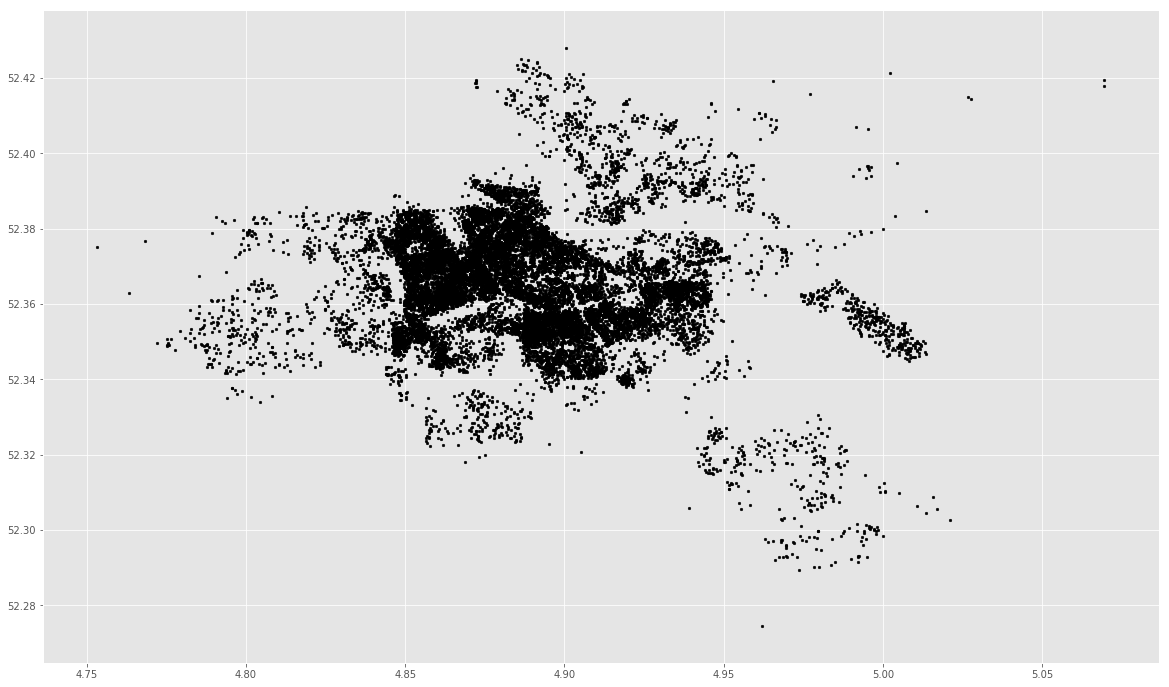

In [3]:
# Getting the lat/lon values and plotting it
f1 = data['longitude'].values
f2 = data['latitude'].values

# Creates an array with the lat/lon values.
X = np.array(list(zip(f1, f2)))

# Plot the 
plt.scatter(f1, f2, c='black', s=7)

## Part 2. Scikit Learn K - Means

In [10]:
# Import K-Means
from sklearn.cluster import KMeans

# Number of clusters/Runs Kmeans/init allows you to input different starting seeds through random, k-means++, and np.array()
kmeans = KMeans(n_clusters=5, init="k-means++")

# Fitting the input data
kmeans = kmeans.fit(X)

# Prediction/labels
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_

In [11]:
# Comparing with scikit-learn centroids
print(centroids) # From sci-kit learn

[[  4.89931601  52.35406076]
 [  4.88182092  52.37742128]
 [  4.98412479  52.33871181]
 [  4.93169371  52.3698665 ]
 [  4.85172452  52.36412813]]


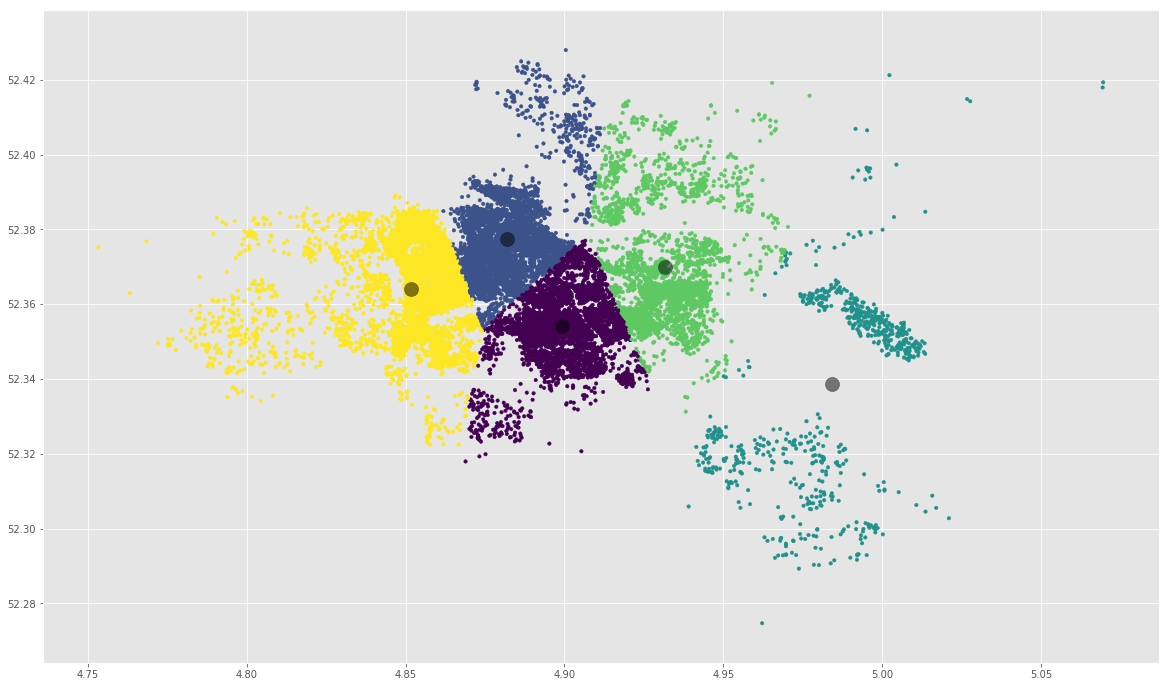

In [12]:
# Plots the clusters in distinct colors. (Labels used to find which cluster each point belongs to.)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=12, cmap='viridis')

# Assigns cluster centers to the centers variable
centers = kmeans.cluster_centers_

# Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# 2-Dimensional DBSCAN Exercise

<i>From Scikit Learn's documentation.


The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.</i>


Documentation Link<br>
http://scikit-learn.org/stable/modules/clustering.html#dbscan




<i> Adpated from the scikit learn documentation.</i>

Import Correct modules to run the tool. 

In [13]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [14]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

# represent points consistently as (lat, lon)
coords = data.as_matrix(columns=['latitude', 'longitude'])


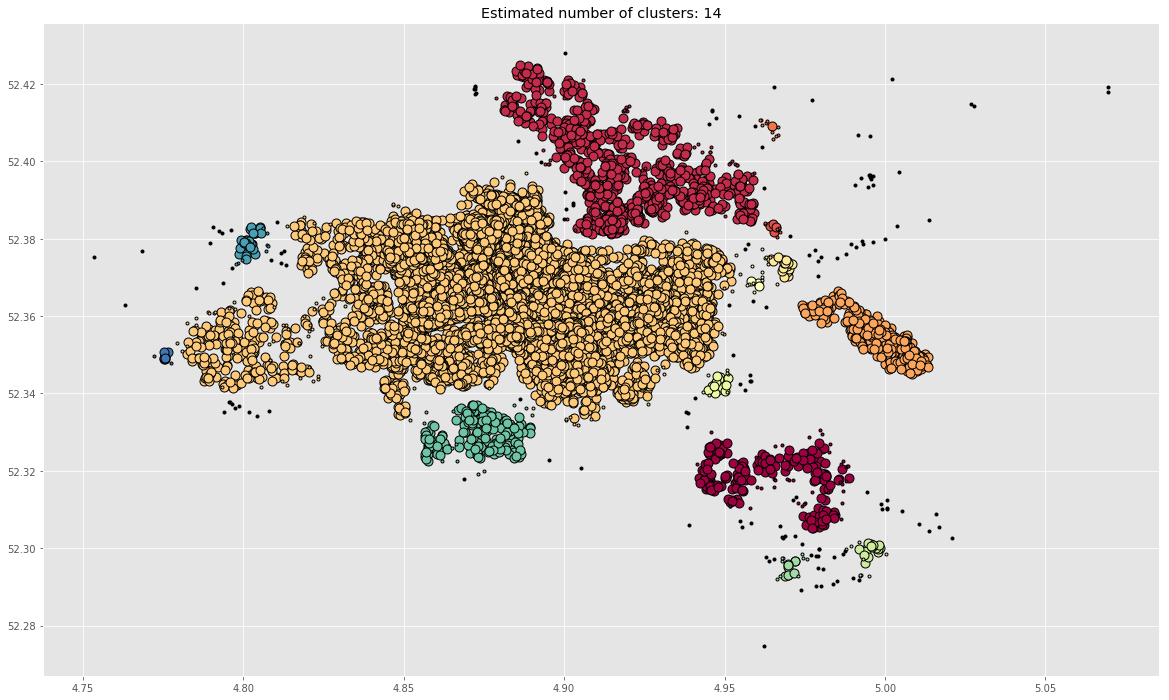

In [15]:
# Runs the dbscan scikit learn example
db = DBSCAN(eps=0.004, min_samples=10, metric="euclidean").fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Retrieves which value the cluster belongs to. 
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)

# Colors chosen for each label
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    # Necessary for cluster visualization
    class_member_mask = (labels == k)

    # Cluster Symbols
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=9)

    # Noise Symbols 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

# Plot Title
plt.title('Estimated number of clusters: %d' % n_clusters_)

# Display data
plt.show()